<a href="https://colab.research.google.com/github/Ieef-msu/Machine-learning/blob/main/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_10_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризация

На прошлой лекции мы начали знакомиться с задачами Unsupervised Learning и поговорили о задаче снижения размерности. Сегодня мы продолжим изучение задач обучения без учителя и поговорим о задаче **кластеризации**.

Что такое кластеризация?
Кластеризация - это разделение исходного набора **неразмеченных** данных на несколько групп, которые называются кластерами. Кластер - довольно нестрогое понятие. Отличительным признаком кластера можно считать следующее утверждение:

"Среднее расстояние между объектами кластера существенно меньше, чем среднее расстояние между парами объектов, один из которых принадлежит кластеру, а другой - нет".

Поставим эту задачу формально.
_____________________________________
**Дано:**

Пусть $X$ - это пространство объектов, из которых мы набираем обучающую выборку.

$X^N$ = $\{x^i\}_{i=1}^N$- обучающая выборка. Еще раз обратим внимание на то, что в выборке отсутствуют метки $y$.

$\rho: X × X → [0,∞)$ - функция расстояния между объектами.

Заметим, что функция расстояния, как и в случае с метрическими алгоритмами, отражает наши ожидания от понятия "близость объектов".

**Найти:**

$y_i \in Y$ - метки принадлежности кластерам объектов. Требования к ним:

* Каждый кластер состоит из близких объектов.
* Объекты разных кластеров далеки друг от друга.

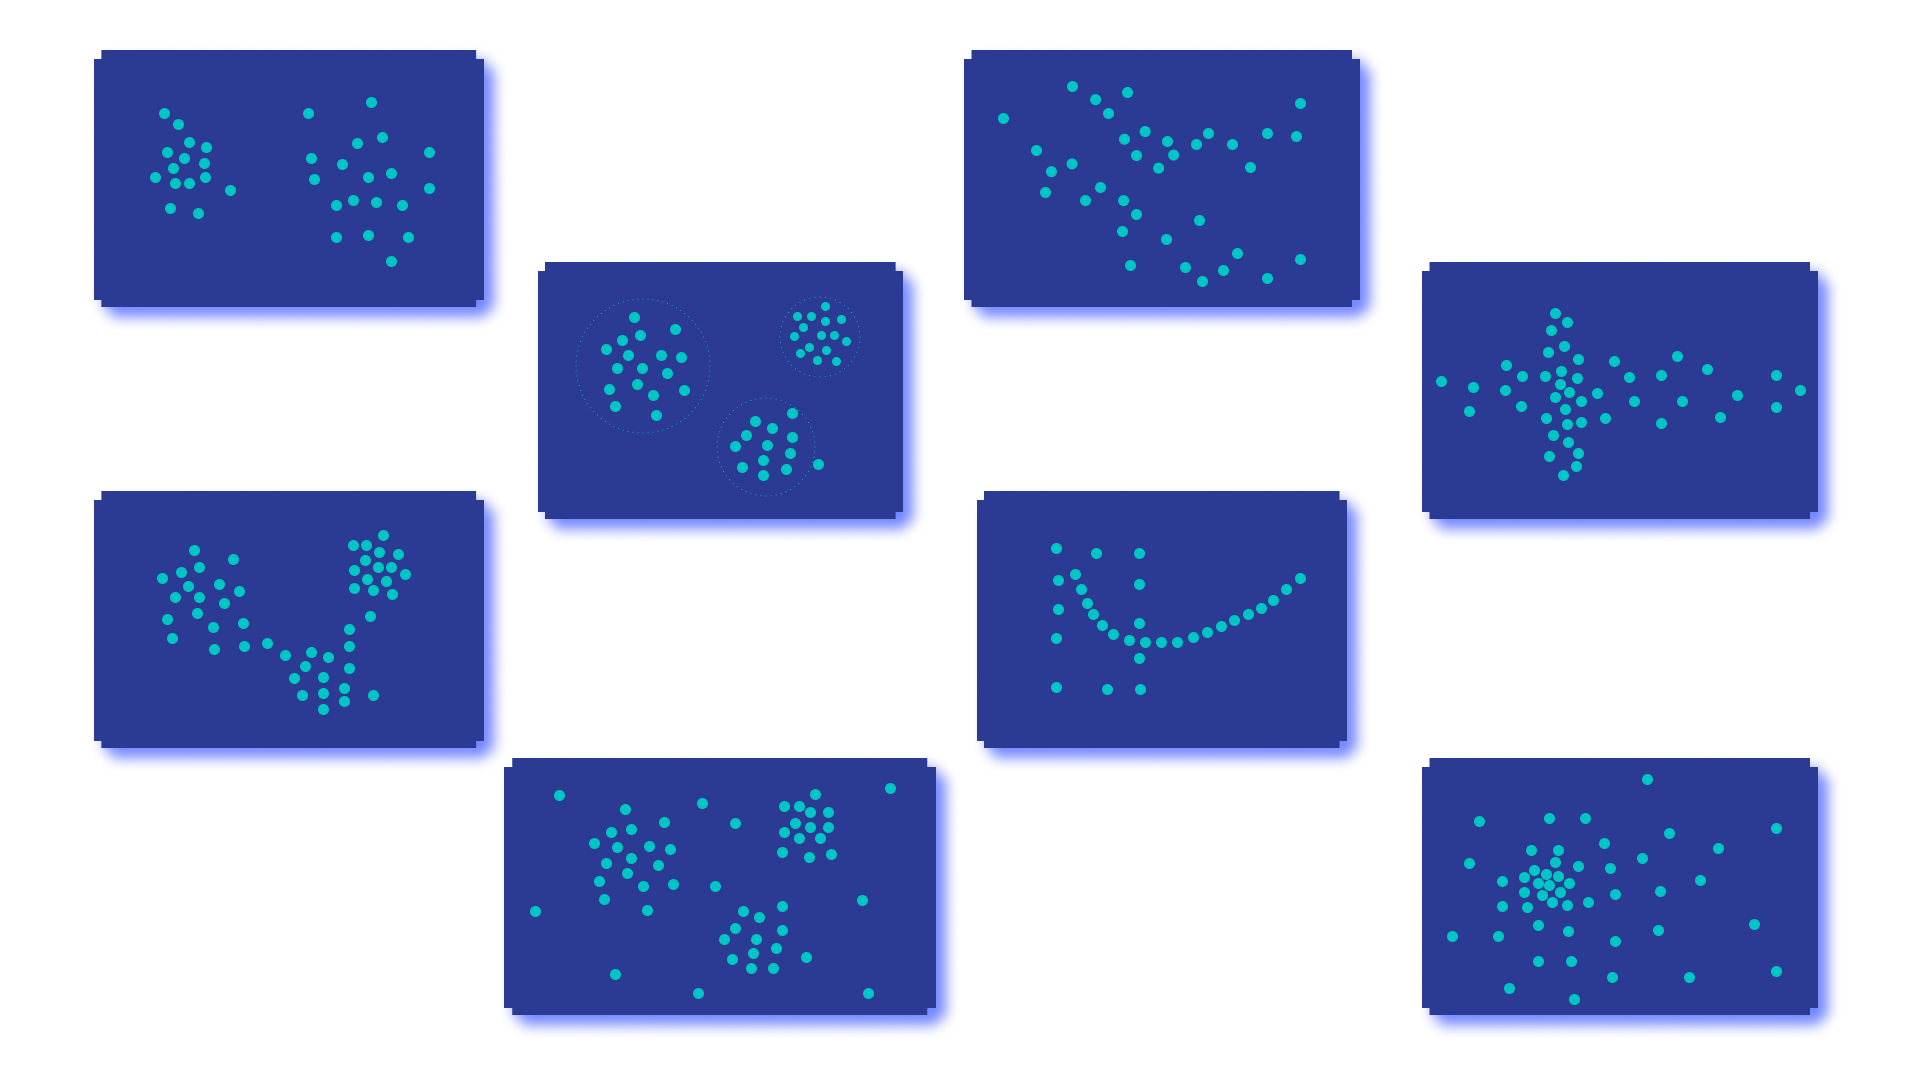

# Сложности такой постановки

Такая постановка задачи кластеризации несколько размыта. Существует понятие корректности постановки задачи (изначально - именно краевой задачи мат. физики) по Адамару.

Задача поставлена корректно по Адамару, если

* Решение этой задачи существует
* Решение этой задачи единственно
* Решение этой задачи непрерывно зависит от исходных данных (то есть если мы немного изменим начальные данные, то решение изменится несильно)

Очевидно, задача кластеризации поставлена некорректно с точки зрения этого определения.

**1) Существование (нетривиального) решения**

При решении задачи кластеризации зачастую мы работаем с высокоразмерными данными, которые не можем проанализировать визуально или каким-то еще обзорным способом. Ровно по этой причине мы и хотим решить эту задачу - в результате ее решения мы получаем некоторое конструктивное описание имеющихся данных. Приступая к решению задачи, мы делаем важное предположение о существовании той самой кластерной структуры, которую мы намереваемся выделить.

Но никто не обещает нам сам факт существовании кластерной структуры. Вполне возможно, что имеющиеся данные выбраны из одного распределения, а реального разделения на кластеры просто нет. В этом случае обнаруженная кластерная структура будет либо тривиальной, либо не отражающей реальной структуры данных.

**2) Единственность решения**

В случае, когда некоторая кластерная структура в данных объективно существует, она может быть неоднозначной. Приведем пример.


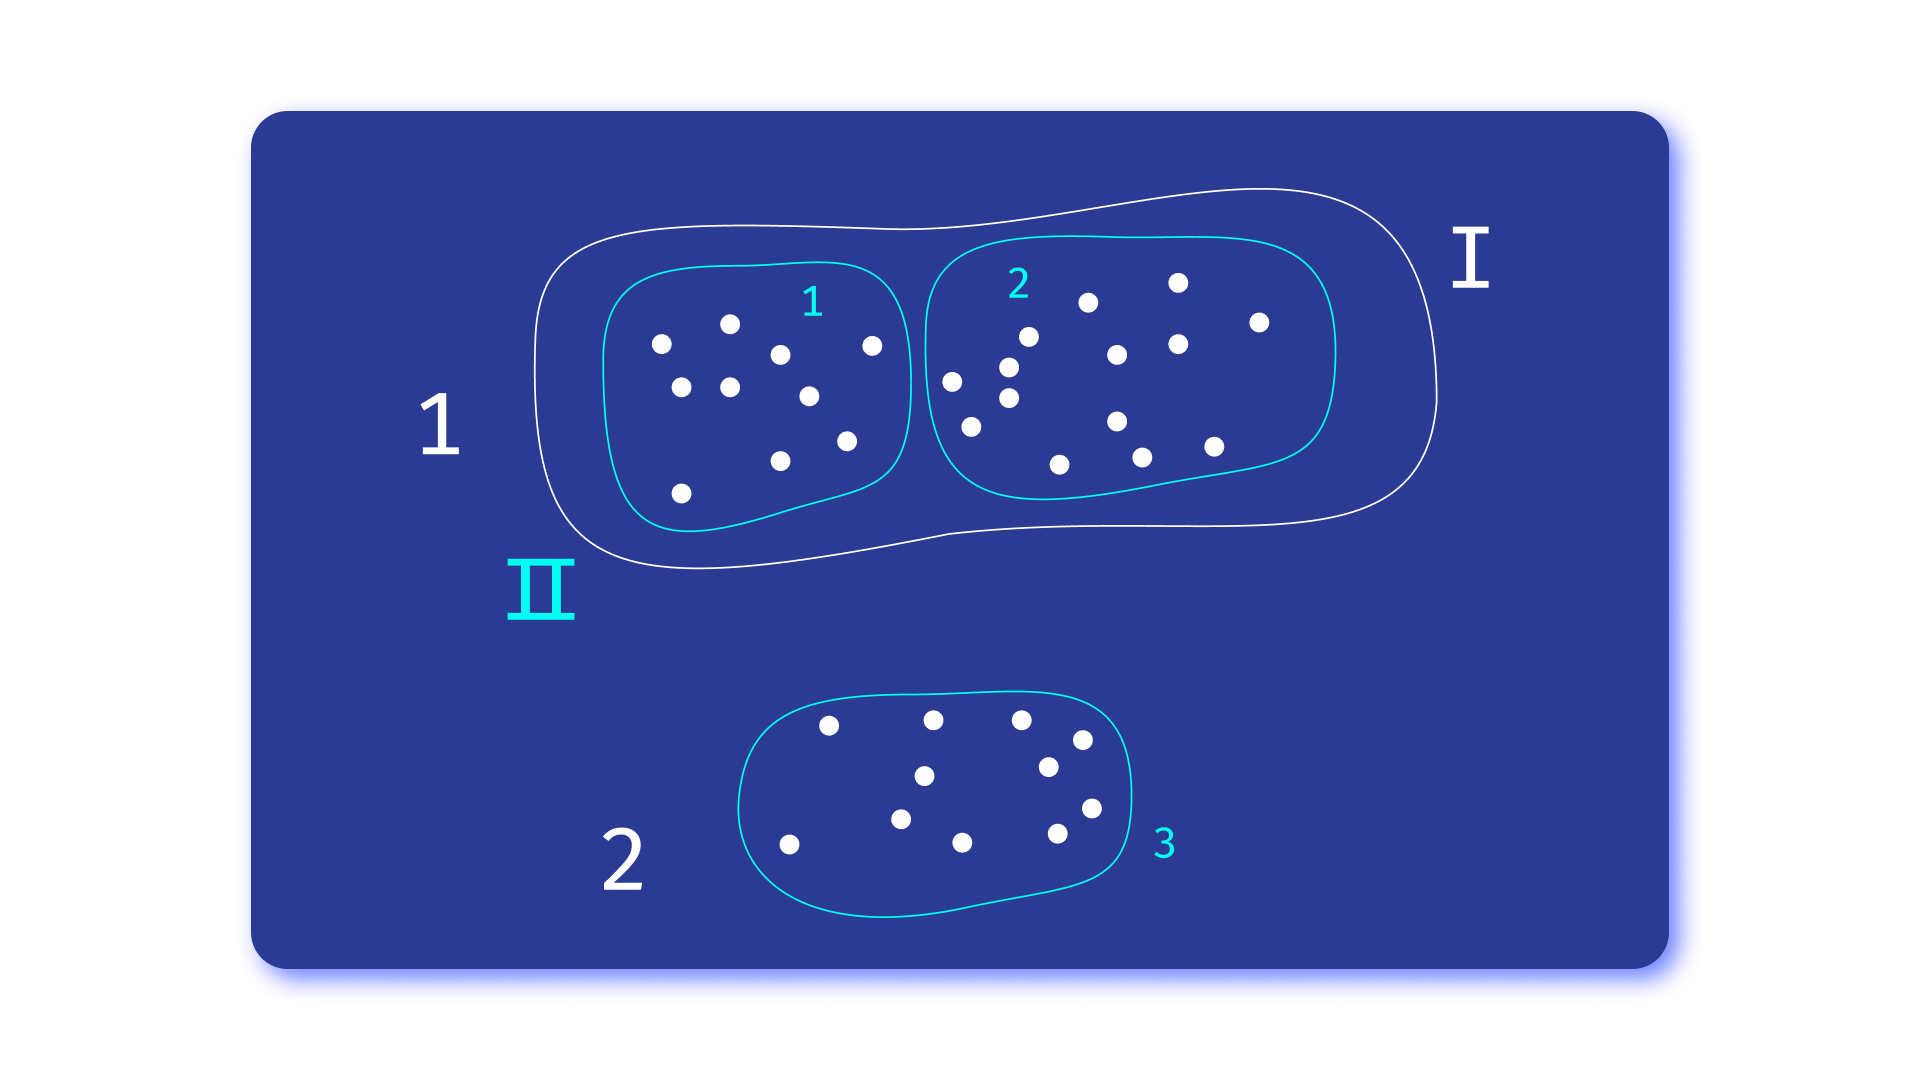

Все это наводит нас на мысль о том, что задача, которая стоит перед нами, непроста в первую очередь в силу своей неоднозначности. Тем не менее существуют довольно эффективные методы решения этой задачи. Мы познакомимся с ними.

# Метод K-Means (K средних)

Один из самых популярных методов кластеризации называется **k-means**. Он повсеместно используется для решения задачи кластеризации. *Алгоритм k средних* является частным случаем более общего **EM-алгоритма**.


Рассмотрим сначала алгоритм K-means, а затем увидим, как он обобщается, превратив его в EM-алгоритм. Для того чтобы обсудить этот алгоритм, введем понятие *центра кластера*.

**Центр кластера** - это точка, представляющая собой центр масс области, отведенной кластеру. Проще говоря, это его геометрическая середина. Если мы знаем набор точек, принадлежащий кластеру, определить его центр очень просто: нужно всего лишь посчитать среднее по всем точкам для каждой координаты. Такой набор координат и задаст нам оценку центра кластера.

Итак, как же выглядит **алгоритм k-средних**?

В качестве предположения будем считать, что число кластеров в имеющемся датасете нам заранее известно и равно оно $K$.

Заметим, что искомые кластеры можно однозначно задать в виде $K$ точек в пространстве признаков.
> Зададимся начальным приближением центров искомых кластеров $\Theta_0 = (\theta_1^0 ... \theta_k^0)$

> Пока не достигнута сходимость:
>> 1.Посчитаем, каким кластерам принадлежат точки имеющегося датасета при условии текущего приближения $G_i$: $g_j^i := \arg\min\limits_{p = 1 ... k}(\rho(Θ_p^{i-1}, x_j))$ для всех $x_j$ из датасета.
>
>> 2. На основе посчитанного распределения датасета по кластерам G = ($g_1^i ... g_N^i $) пересчитаем новые центры кластеров $\Theta_i = (\theta_1^i ... \theta_k^i)$.

**Замечание:** Важно заранее сказать, что мы понимаем под сходимостью. Мы будем понимать под сходимостью ситуацию, при которой каждый следующий шаг приводит к крайне незначительному изменению нашей оценки центров кластеров. В следующем примере мы увидим, что с некоторого шага эта оценка вообще не будет меняться. В реальности во многих алгоритмах мы задаемся некоторым маленьким числом $ϵ$, а затем сравниваем изменение оценок с этим значением. Если оказалось, что изменение оценок из шага в шаг полуается меньше, чем $ϵ$, мы говорим, что достигли сходимости.

Рассмотрим работу этого алгоритма на примере.

Для начала рассмотрим всего 2 кластера, к тому же демонстрировать работу алгоритма мы будем в двумерном случае (то есть, когда вектор признакового описания двумерный).

Text(0, 0.5, 'Координата Y')

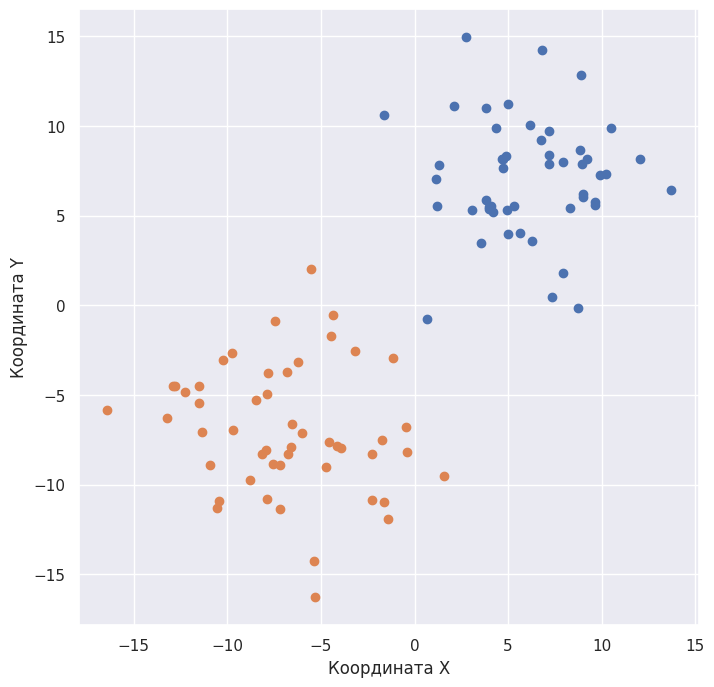

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

# Генерация случайных данных
data_a = {
    'x': 3.5 * np.random.randn(50) + 7,
    'y': 3.5 * np.random.randn(50) + 7,
}

data_b = {
    'x': 3.5 * np.random.randn(50) - 7,
    'y': 3.5 * np.random.randn(50) - 7,
}

# Создание графики
plt.figure(figsize=(8, 8))
plt.scatter(data_a['x'], data_a['y'])
plt.scatter(data_b['x'], data_b['y'])

# Добавление названий осей
plt.xlabel('Координата X')
plt.ylabel('Координата Y')

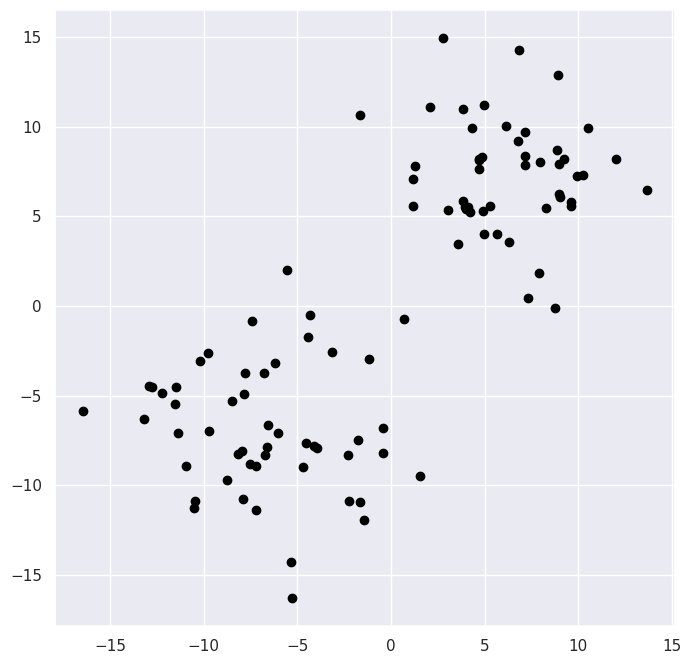

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определение функции расстояния
distance = lambda x1, y1, x2, y2: np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Определение класса Point
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def calculate_distance(self, other_point):
        return distance(self.x, self.y, other_point.x, other_point.y)

    def assign_cluster(self, cluster):
        self.cluster = cluster

    def plot(self, color="black"):
        plt.scatter([self.x], [self.y], c=color)


# Создание списка точек
points = [
    Point(data_a['x'][i], data_a['y'][i]) for i in range(len(data_a['x']))
] + [
    Point(data_b['x'][i], data_b['y'][i]) for i in range(len(data_b['x']))
]

plt.figure(figsize=(8, 8))

for point in points:
    point.plot()

In [ ]:
def step(points, cluster_center_1, cluster_center_2):
    """Выполняет один шаг алгоритма k-means."""
    for point in points:
        distance_to_cluster_1 = point.calculate_distance(cluster_center_1)
        distance_to_cluster_2 = point.calculate_distance(cluster_center_2)

        if distance_to_cluster_1 < distance_to_cluster_2:
            point.cluster = 1
        else:
            point.cluster = 2

    return points

In [ ]:
def find_centers(points):
    """Находит центроиды кластеров."""
    cluster_1 = [point for point in points if point.cluster == 1]
    cluster_2 = [point for point in points if point.cluster == 2]

    cluster_center_1 = Point(np.mean([p.x for p in cluster_1]),
                             np.mean([p.y for p in cluster_1]))

    cluster_center_2 = Point(np.mean([p.x for p in cluster_2]),
                             np.mean([p.y for p in cluster_2]))

    return cluster_center_1, cluster_center_2

In [ ]:
def update(points, cluster_center_1, cluster_center_2, rjm):
    """
    Выполняет одну итерацию алгоритма k-means.

    Args:
    points (list): Список точек.
    cluster_center_1 (Point): Центроид первого кластера.
    cluster_center_2 (Point): Центроид второго кластера.
    rjm (int): Режим обновления (0 или 1).

    Returns:
    tuple: Обновленные точки, центроиды кластеров и новый режим.
    """
    if rjm:
        old_cluster_center_1, old_cluster_center_2 = cluster_center_1, cluster_center_2

        # Обновление центроидов
        cluster_center_1, cluster_center_2 = find_centers(points)

        # Отображение движения центроидов
        plt.arrow(old_cluster_center_1.x, old_cluster_center_1.y,
                  cluster_center_1.x - old_cluster_center_1.x,
                  cluster_center_1.y - old_cluster_center_1.y, color='black')
        plt.arrow(old_cluster_center_2.x, old_cluster_center_2.y,
                  cluster_center_2.x - old_cluster_center_2.x,
                  cluster_center_2.y - old_cluster_center_2.y, color='black')
    else:
        # Обновление кластеров для точек
        points = step(points, cluster_center_1, cluster_center_2)

    # Отображение точек и центроидов
    for p in points:
        p.plot('red' if p.cluster == 1 else 'blue')

    cluster_center_1.plot('magenta')
    cluster_center_2.plot('green')

    return points, cluster_center_1, cluster_center_2, 1-rjm

На этом моменте возникает закономерный вопрос - по какому принципу задаются начальные приближения центров кластеров?

Вообще говоря, существуют некоторые *эвристики*, которые помогают делать этот выбор не совсем случайно. Но мы не будем углубляться в подробное обсуждение этого вопроса, и, следуя классическому алгоритму, выберем начальные приближения случайным образом. Например, (-15,10) и (15, -10).

In [ ]:
c1 = Point(-15,10)
c2 = Point(15,-10)
rjm = 0

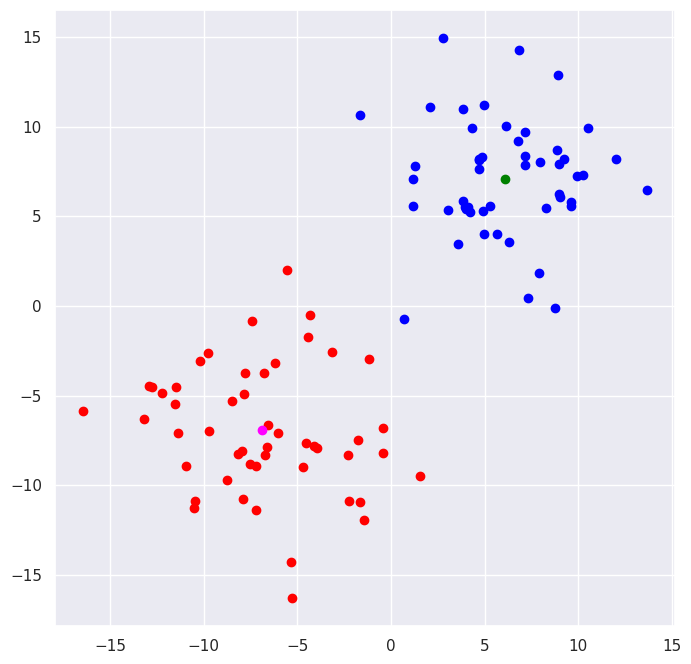

In [ ]:
"""
Функция update делает и отрисовывает всего один шаг работы алгоритма!
Для наблюдения работы алгоритма требуется исполнить данную ячейку (и все ячейки с функцией update) несколько раз!
"""
plt.figure(figsize=(8,8))
points, c1, c2, rjm = update(points, c1, c2, rjm)

## Обобщим на случай нескольких кластеров

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def step(points, centers):
    """
    Выполняет один шаг алгоритма k-means для нескольких кластеров.

    Args:
    points (list): Список точек.
    centers (dict): Словарь центроидов кластеров.

    Returns:
    list: Обновленные точки.
    """
    for point in points:
        distances = [point.calculate_distance(center) for center in centers.values()]
        cluster = np.argmin(distances) + 1
        point.cluster = cluster

    return points

def find_centers(points):
    """
    Находит центроиды кластеров из обновленных точек.

    Args:
    points (list): Список точек.

    Returns:
    dict: Словарь центроидов кластеров.
    """
    clusters = defaultdict(list)
    for point in points:
        clusters[point.cluster].append(point)

    centers = {}
    for cluster_id, cluster_points in clusters.items():
        mean_x = np.mean([p.x for p in cluster_points])
        mean_y = np.mean([p.y for p in cluster_points])
        centers[cluster_id] = Point(mean_x, mean_y)

    return centers

def update(points, centers, rjm, colors_clusters, colors_centers):
    """
    Выполняет одну итерацию алгоритма k-means для нескольких кластеров.

    Args:
    points (list): Список точек.
    centers (dict): Словарь центроидов кластеров.
    rjm (int): Режим обновления (0 или 1).
    colors_clusters (list): Список цветов для кластеров.
    colors_centers (list): Список цветов для центроидов.

    Returns:
    tuple: Обновленные точки, центроиды и новый режим.
    """
    if rjm:
        old_centers = centers.copy()
        centers = find_centers(points)

        # Отображение движения центроидов
        for cluster_id, center in old_centers.items():
            plt.arrow(center.x, center.y,
                      centers[cluster_id].x - center.x,
                      centers[cluster_id].y - center.y, color='black')
    else:
        points = step(points, centers)

    # Отображение точек и центроидов
    for point in points:
        point.plot(colors_clusters[point.cluster - 1])

    for cluster_id, center in centers.items():
        center.plot(colors_centers[cluster_id - 1])

    return points, centers, 1-rjm

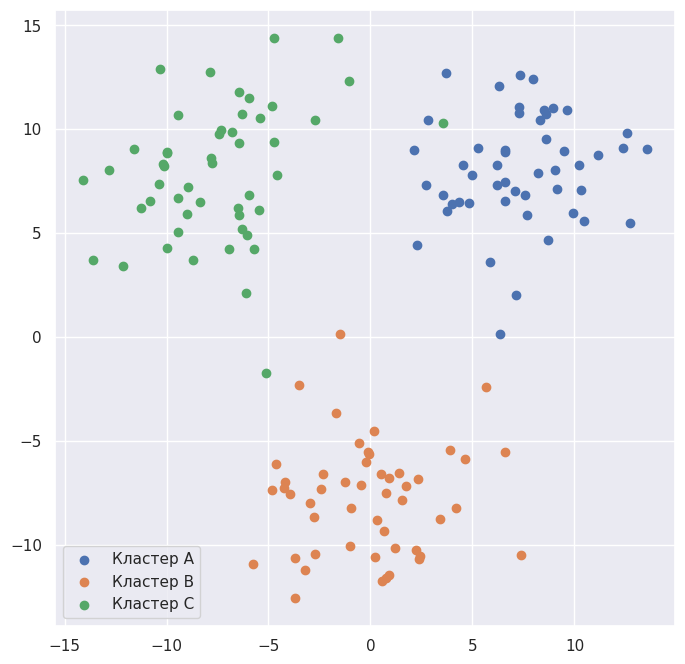

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Генерация случайных данных для трех кластеров
np.random.seed(42)

a_data = {
    'x': 3.0 * np.random.randn(50) + 8,
    'y': 3.0 * np.random.randn(50) + 8
}
b_data = {
    'x': 3.0 * np.random.randn(50),
    'y': 3.0 * np.random.randn(50) - 8
}
c_data = {
    'x': 3.0 * np.random.randn(50) - 8,
    'y': 3.0 * np.random.randn(50) + 8
}


plt.figure(figsize=(8, 8))

plt.scatter(a_data['x'], a_data['y'], label='Кластер A')
plt.scatter(b_data['x'], b_data['y'], label='Кластер B')
plt.scatter(c_data['x'], c_data['y'], label='Кластер C')

plt.legend()

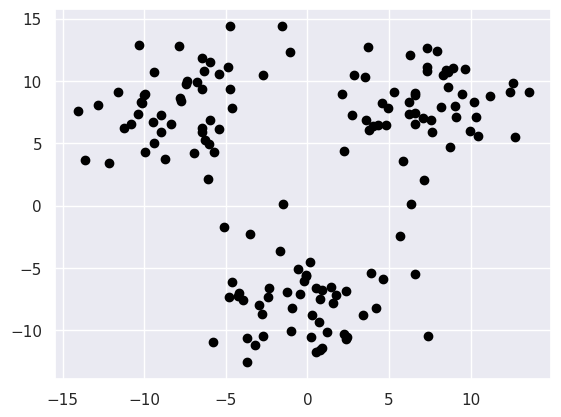

In [ ]:
points = [
    Point(a_data['x'][i], a_data['y'][i]) for i in range(len(a_data['x']))
] + [
    Point(b_data['x'][i], b_data['y'][i]) for i in range(len(b_data['x']))
] + [
    Point(c_data['x'][i], c_data['y'][i]) for i in range(len(c_data['x']))
]

for point in points:
    point.plot("black")
plt.show()

In [ ]:
# Определение начальных условий

centers = {
    1: Point(-15, -15),
    2: Point(15, -15),
    3: Point(0, 15)
}
colors_clusters = ['g', 'b', 'r']
colors_centers = ['y', 'm', '#000000']
rjm = 0

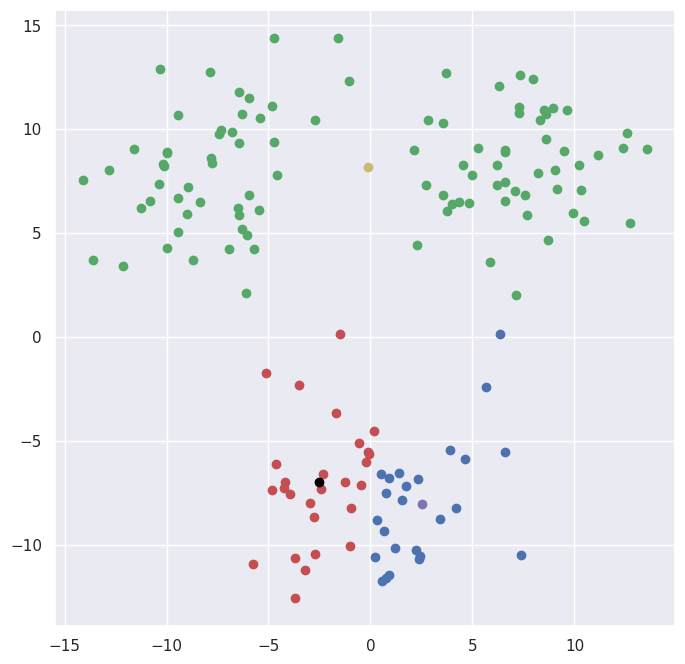

In [ ]:
plt.figure(figsize=(8,8))
points, centers, rjm = update(points, centers, rjm, colors_clusters, colors_centers)

## А если выбрать другие стартовые приближения?

In [ ]:
centers = {
    1: Point(-1, -20),
    2: Point(15, 5),
    3: Point(-15, -15)
}
colors_clusters = ['g', 'b', 'r']
colors_centers = ['y', 'm', '#000000']
rjm = 0

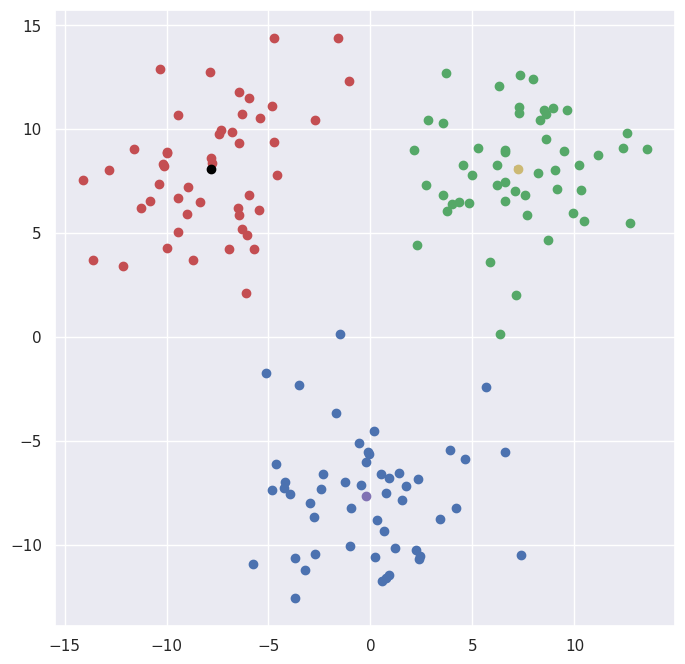

In [ ]:
plt.figure(figsize=(8,8))
points, centers, rjm = update(points, centers, rjm, colors_clusters, colors_centers)

А что если мы выберем неверное число кластеров?

In [ ]:
# 2 класстера
centers = {
    1: Point(-1, 20),
    2: Point(15,5)
    }
colors_clusters = ['g', 'b']
colors_centers = ['y', 'm']
rjm = 0

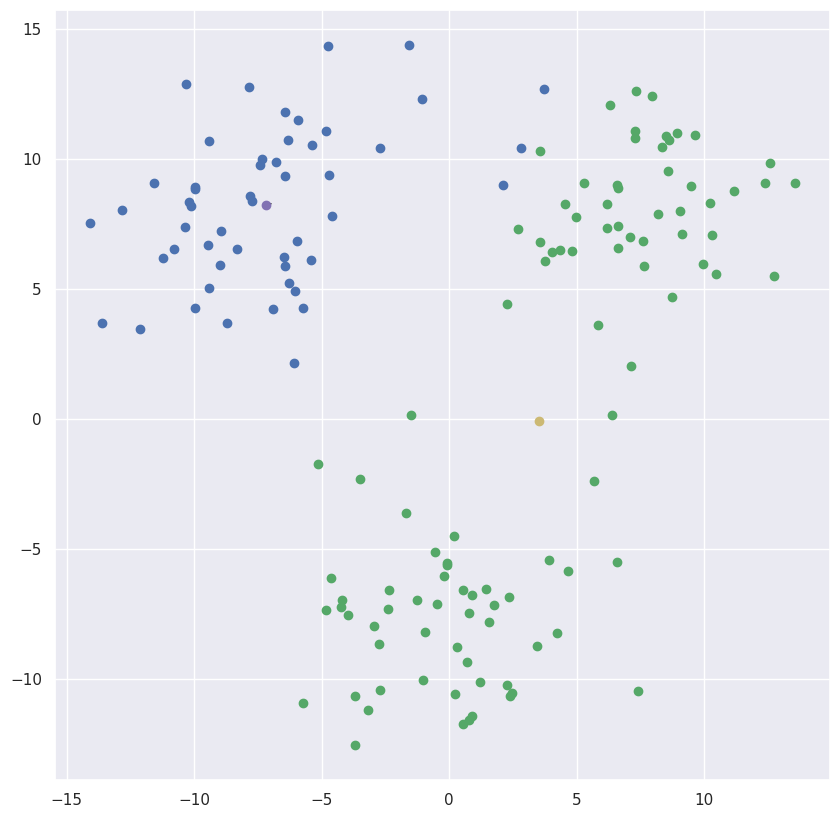

In [ ]:
plt.figure(figsize=(10,10))
points, centers, rjm = update(points, centers, rjm, colors_clusters, colors_centers)

In [ ]:
# 4 кластера

centers = {1: Point(-1, 20),
           2: Point(15,5),
           3: Point(-10, -10),
           4: Point(10,10)}
colors_clusters = ['g', 'b', 'r', '#ff8243']
colors_centers = ['y', 'm', '#000000', "#8b00ff"]
rjm = 0

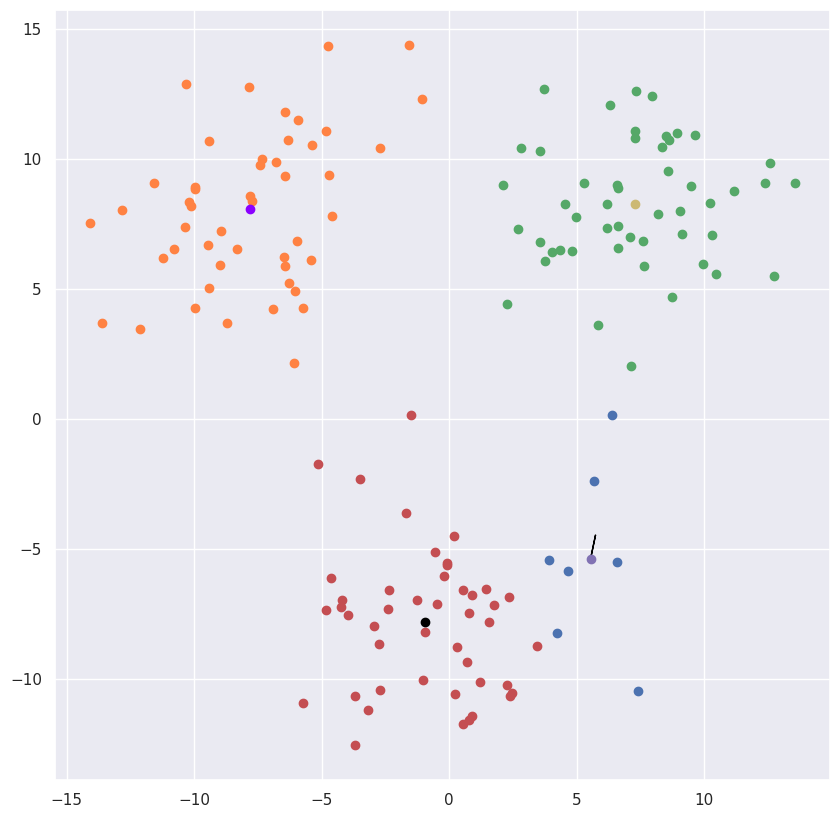

In [ ]:
plt.figure(figsize=(10,10))
points, centers, rjm = update(points, centers, rjm, colors_clusters, colors_centers)

# Выводы:

1. Алгоритм очень сильно зависит от начального приближения центров кластеров.
2. При неверном заданном числе кластеров мы получаем формально корректный результат, который может быть не вполне правильным отображением реальности.

## Реализация в sklearn

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = [[p.x, p.y] for p in points]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

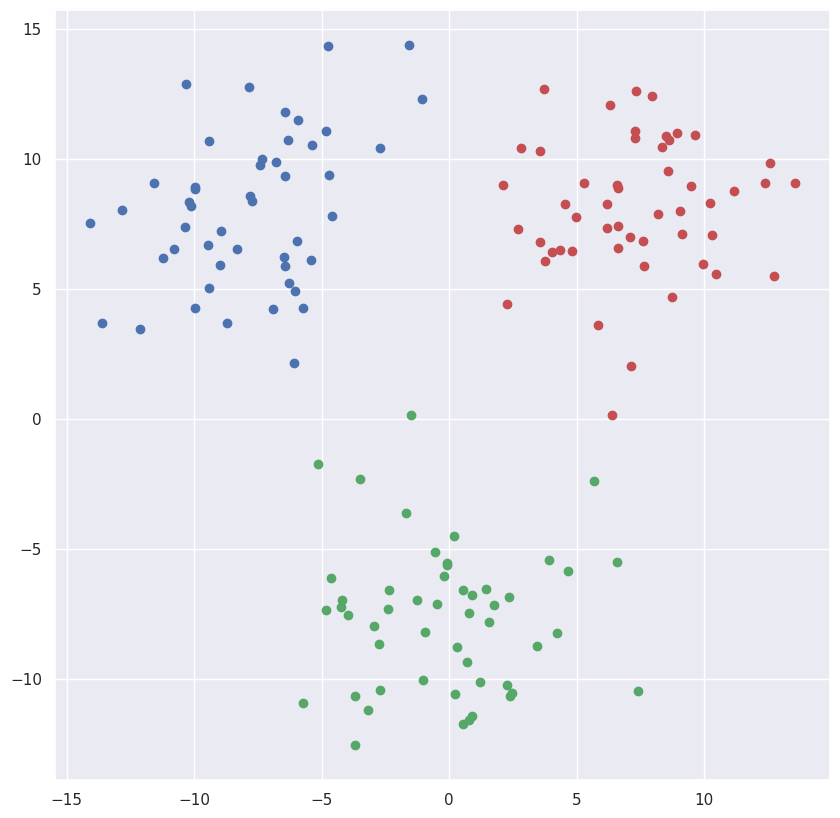

In [ ]:
plt.figure(figsize=(10,10))
for i,p in enumerate(X):
  plt.scatter([p[0]], [p[1]], c=colors_clusters[kmeans.labels_[i]])

In [ ]:
kmeans.inertia_

2415.5325417153126

Что если поставить другое число кластеров?

In [ ]:
inertias = []
for i in range(1, 26):
  kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
  inertias.append(kmeans.inertia_)

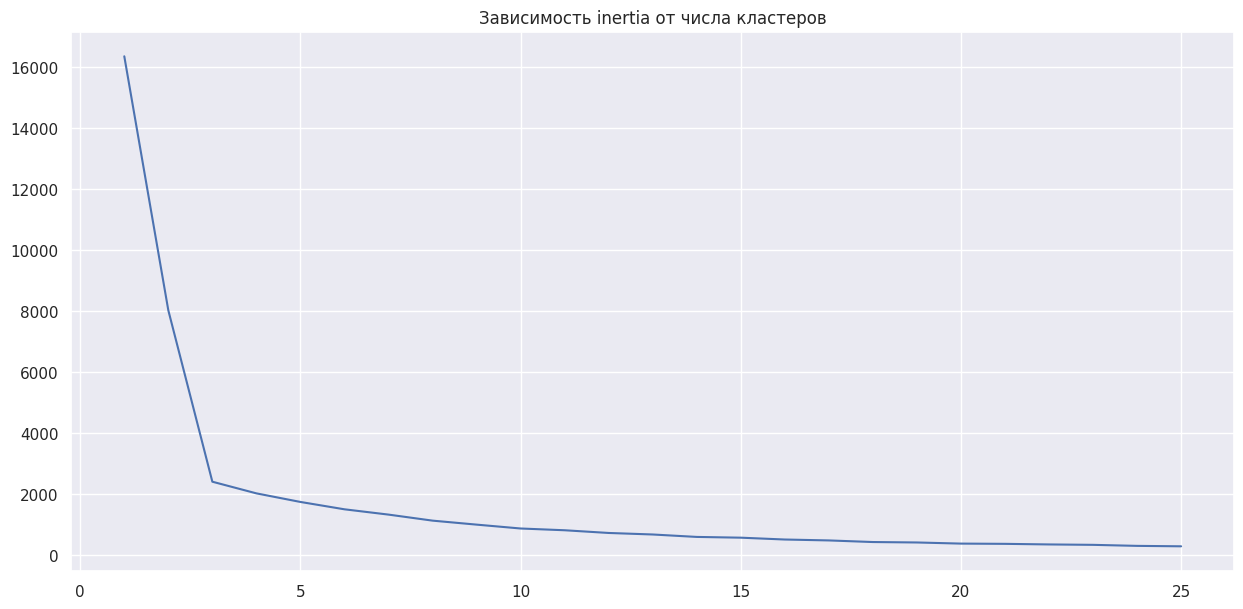

In [ ]:
plt.figure(figsize=(15, 7))
plt.title('Зависимость inertia от числа кластеров')
plt.plot(np.arange(1, 26, 1), inertias)

In [ ]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(X)

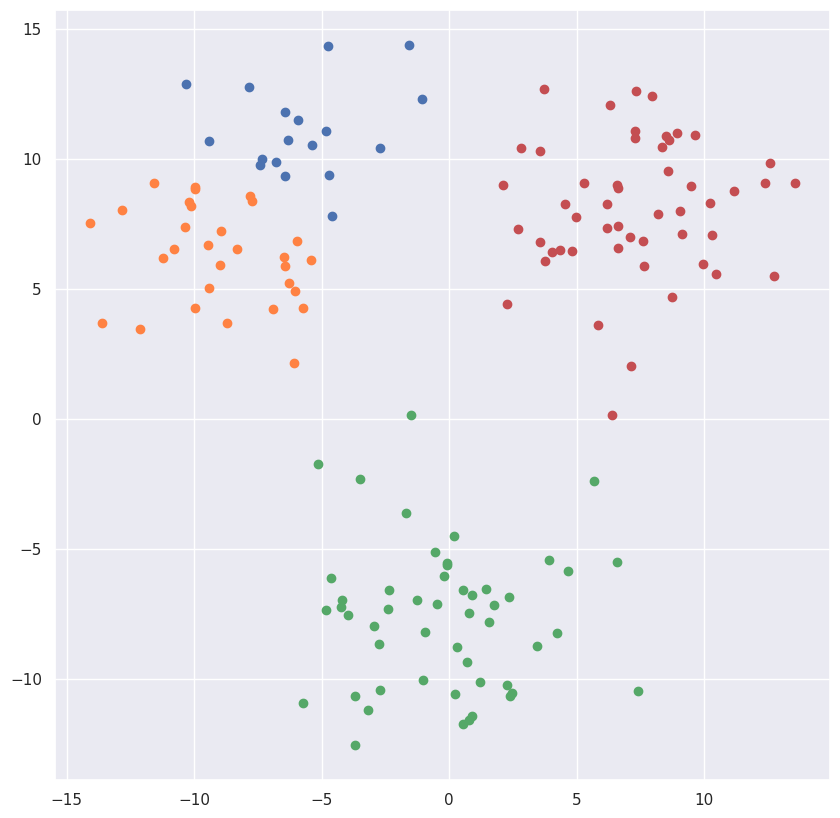

In [ ]:
plt.figure(figsize=(10,10))

colors_clusters = ['g', 'b', 'r', '#ff8243']
for i,p in enumerate(X):
  plt.scatter([p[0]], [p[1]], c=colors_clusters[kmeans.labels_[i]])

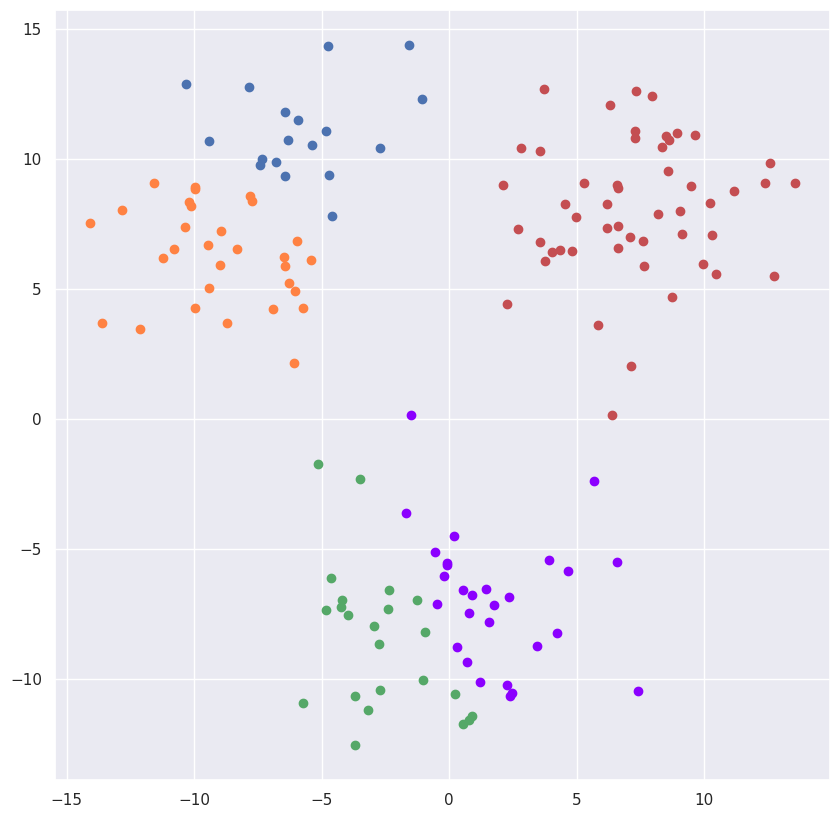

In [ ]:
plt.figure(figsize=(10,10))

kmeans = KMeans(n_clusters=5,random_state=0).fit(X)
colors_clusters = ['g', 'b', 'r', '#ff8243', "#8b00ff"]
for i,p in enumerate(X):
  plt.scatter([p[0]], [p[1]], c=colors_clusters[kmeans.labels_[i]])

______________
> **Справка: EM-алгоритм**
>
> EM-алгоритм (Expectation-Maximization) - это алгоритм оценки оптимальных параметров некоторой модели $Θ$ по набору наблюдаемых переменных $x$ при помощи введения вектора некоторых скрытых переменных $G$ (то есть тех переменных, которые мы не можем непосредственно пронаблюдать, но можем некоторым образом оценить).
>
> Проведем аналогию с алгоритмом *k-means*: оптимальные параметры $Θ$ задавали нам распределение точек по кластерам. Именно они и были искомыми метками кластеров. Скрытые переменные $G$ задавали нам центры кластеров. Мы не могли пронаблюдать их напрямую, но могли оценить их при текущем приближении $Θ$. Наблюдаемые переменные представляли собой координаты точек, которые были в нашем датасете.
> EM-алгоритм, как и алгоритм k-means, состоит из двух повторяющихся итеративно шагов:
> 0. Зададим начальное приближение параметров $Θ_0$
>
>>Пока не будет достигнута сходимость:
>>>1.Expectation-шаг: посчитаем ожидаемые значения скрытых переменных $G_i$ при условии текущего приближения $Θ_{i-1}$
>>>2. Maximization-шаг: решим задачу максимизации правдоподобия наблюдаемых значений $x$ при условии скрытых переменных $G_i$. То есть $Θ_i = argmax(P(x|G_i, Θ))$

Алгоритм прекратит свою работу, когда изменения вектора параметров $Θ$ на некотором шаге станут несущественны.
________________________________

**Замечание:** Нужно отметить, что K-Means способен обнаруживать лишь достаточно простые кластерные структуры. Например, с определением кольцевых кластеров у него возникнут проблемы, и потребуется использовать другие методы кластеризации.

# Как бороться с обозначенными проблемами?
1. Мультистарт. Мы можем запустить алгоритм много раз с разными начальными приближениями центров кластеров, а затем выбрать то решение, где сумма расстояний от каждого объекта до центра масс его кластера - наименьшая.

2. Иерархическая кластеризация

# Иерархическая кластеризация
______________________________________
Иерархическая кластеризация предполагает два различных глобальных подхода - аггломеративная иерархическая кластеризация и дивизионная. Отличия между ними состоят в том, что аггломеративная кластеризация предполагает последовательное слияние различных кластеров, в то время как дивизионная - последовательное разбиение. В этой лекции мы будем обсуждать аггломеративную кластеризацию.
______________________________________


Идея иерархической кластеризации состоит в последовательном проведении некоторой итерационной процедуры (то есть процедуры, состоящей из некоторого количества повторяющихся шагов), позволяющей на основе известного разбиения на $N$ кластеров провести слияние наиболее близких из них (или же наоборот, разбить один из кластеров на 2 разных) получив разбиение на $N-1$ кластер (или же на $N+1$). Таким образом, мы получим последовательность разбиений на разное число кластеров нашей выборки и выберем наилучшее из них.

# Алгоритм Ланса-Уильямса

Алгоритм, позволяющий проводить последовательное слияние кластеров при условии, что мы имеем некоторую функцию, позволяющую измерить расстояние между двумя кластерами. Назовем эту функцию $R(U,V)$, где $U$ и $V$ - некоторые кластеры.

> 1. Пусть сначала все кластеры одноэлементные. То есть каждый объект нашей выборки представляет собой в начальном приближении отдельный кластер.
> 2. Повторим слеющий пункт $L-1$ раз, где $L$ - размер нашей выборки:
> 3. Найдем два ближайших кластера в нашей структуре, согласно значению функции $R(U, V)$, и сольем их в один кластер. Обозначим найденную кластерную структуру на данном шаге $t$ как $C_t$,

На выходе этого алгоритма мы получаем последовательность разбиений на кластеры $C_1 ... C_L$, где разбиение $C_1$ - тривиальное разбиение на индивидуальные кластеры, $C_2$ - разбиение на $L-1$ индивидуальный кластер и 1 кластер, содержащий 2 точки и т.д., а $C_L$ - тривиальное разбиение на один единственный кластер, содержащий все объекты.

Для удобства визуализации такого варианта кластеризации часто используют специальную диаграмму, называемую **дендрограммой**.

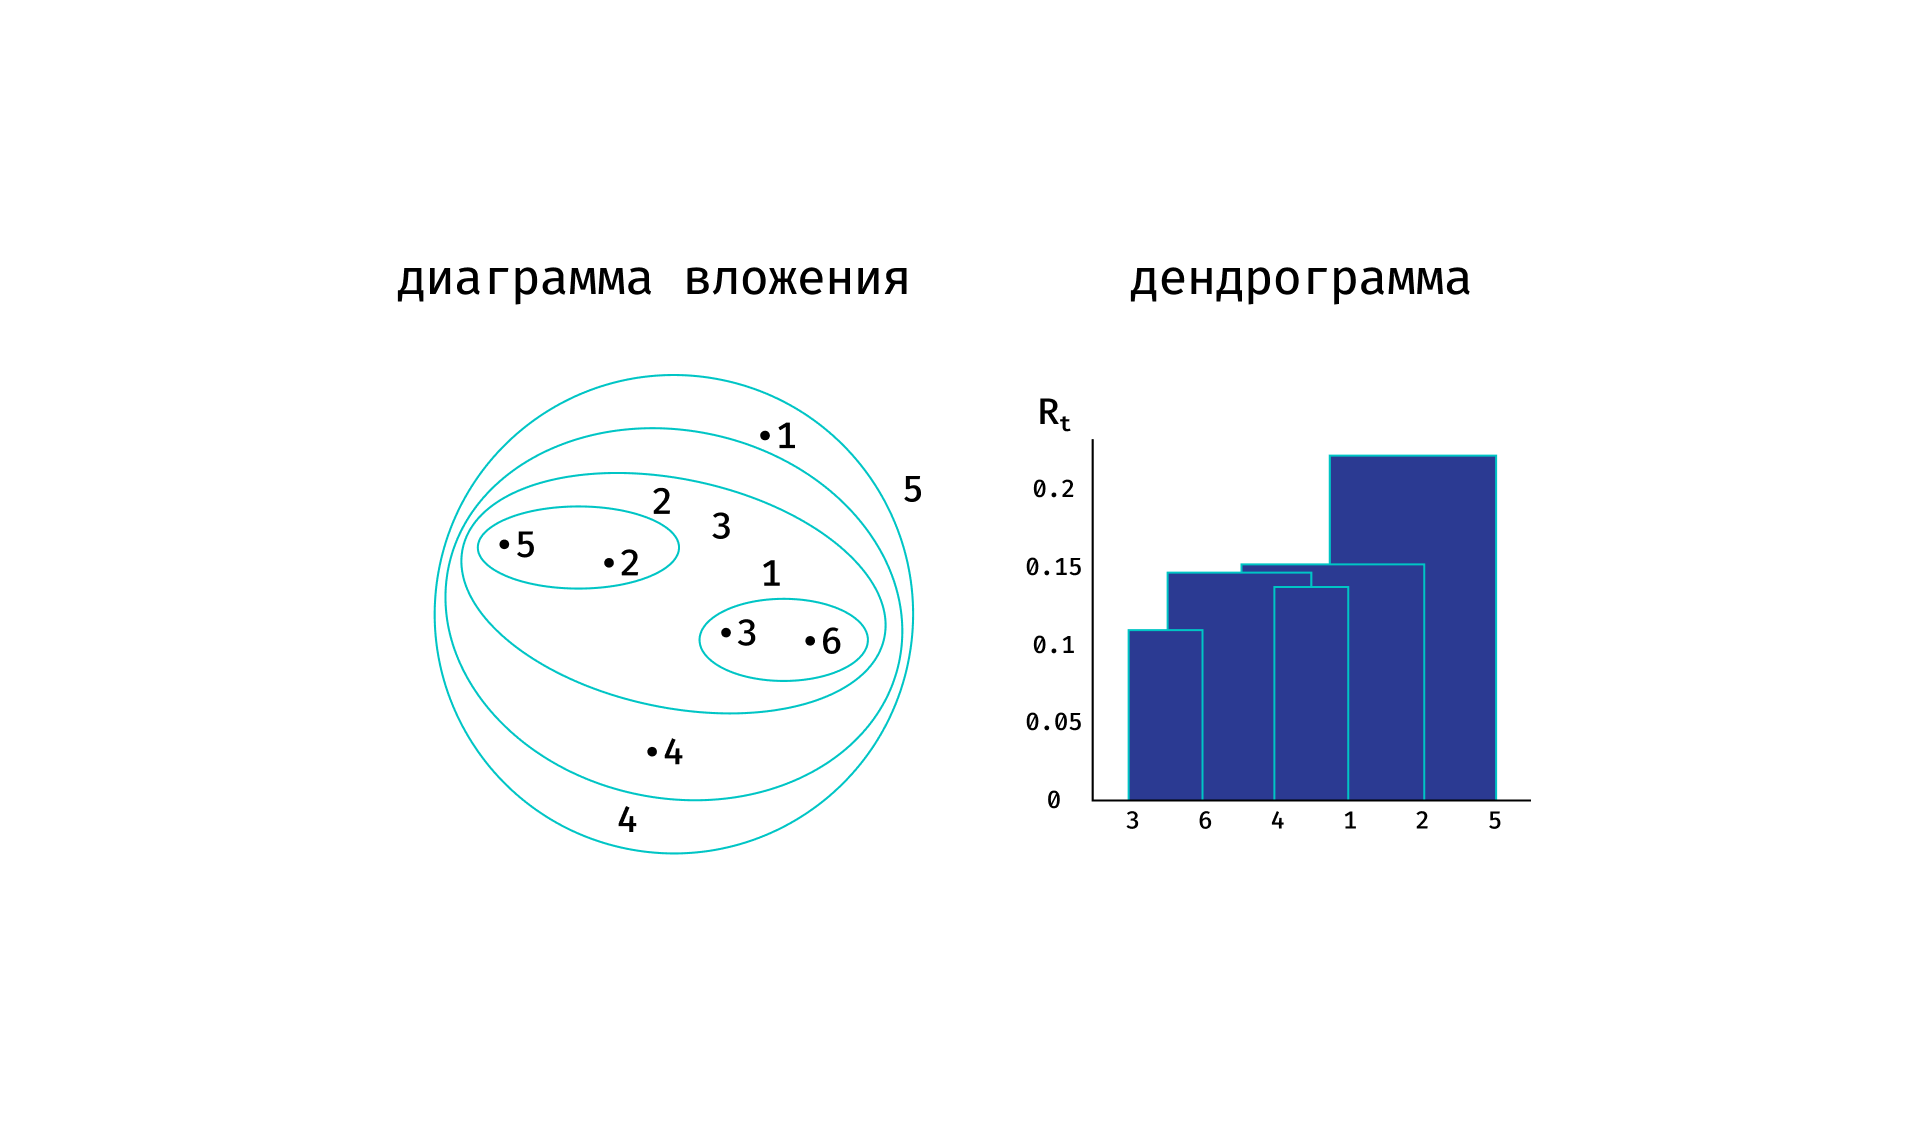

# Формула Ланса-Уильямса

Как все же измерить расстояние между кластерами?

На самом деле существует довольно много различных вариантов.
Например,
* Расстояние ближайшего соседа. $R(U, V)$ = $\min\limits_{x \in U, y \in V}(\rho(x,y))$
* Расстояние дальнего соседа. $R(U, V)$ = $\max\limits_{x \in U, y \in V}(\rho(x,y))$
* Среднее групповое расстояние. $R(U, V)$ = $\frac{1}{N}\sum\limits_{x \in U, y \in V}(\rho(x,y))$

Выбрать наиболее подходящий для нашей задачи вариант можно, исходя из эвристик, которые мы можем сформировать, учитывая наше знание предметной области или особенностей задачи, а также попробовав несколько вариантов и определив, какая кластеризация минимизирует сумму расстояний от каждого объекта до центра его кластера.

Существует формула, позволяющая в общем виде описать все эти и многие другие способы подсчета расстояния между кластерами.

Будем считать, что кластер $W$ = $U \bigcup V$. Будем также считать, что мы знаем расстояния между кластерами $R(U, S)$ и $R(V, S)$.

Тогда $$R(W, S) = α_U\times R(U,S) + α_V\times R(V,S) + β\times R(U,V) + γ\times |R(U,S) - R(V,S)|$$

Мы в этой формуле можем выбирать коэффициенты $α_U, α_V, β, γ$

Например, если мы положим $α_U = α_V = \frac{1}{2}, β=0, γ=-\frac{1}{2}$, то мы получим формулу для расстояния ближайшего соседа.
А при наборе коэффициентов $α_U = α_V = \frac{1}{2}, β=0, γ=\frac{1}{2}$ получим расстояние дальнего соседа.

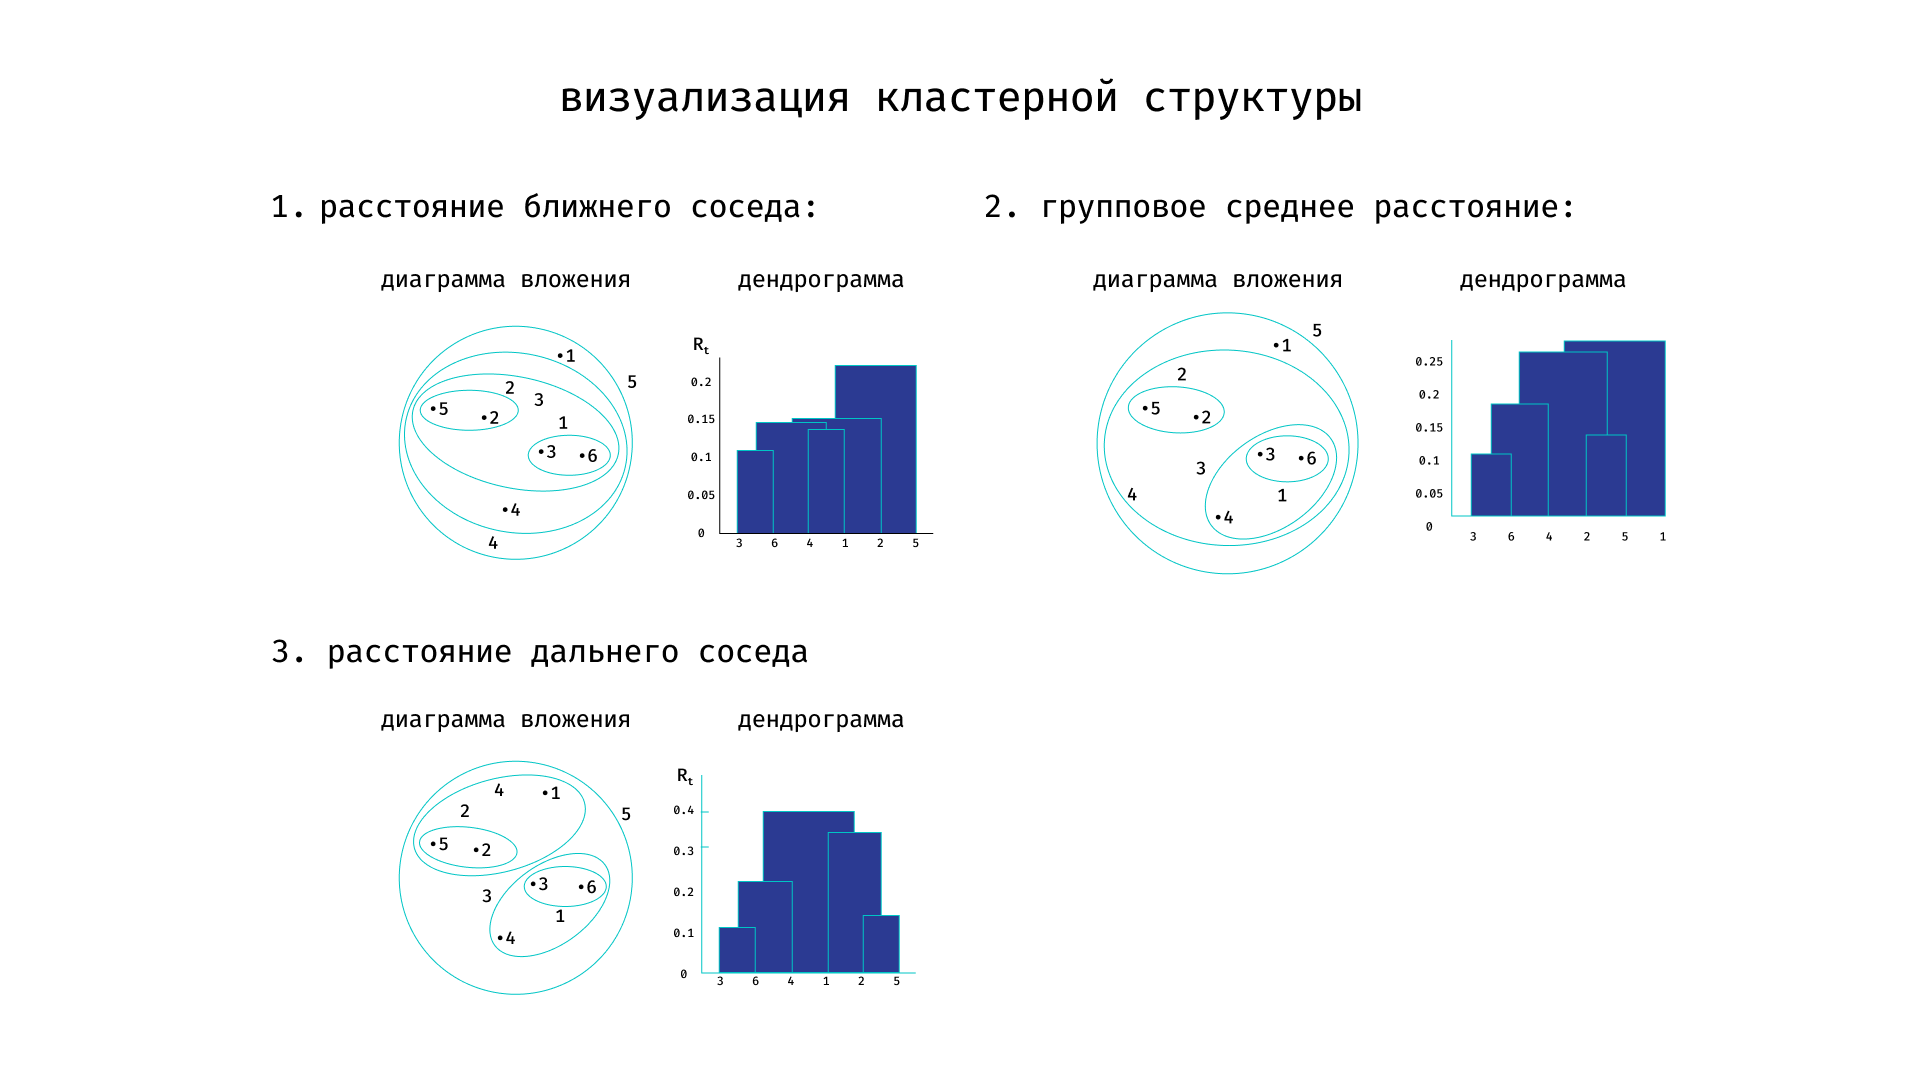

# Реализация в scipy

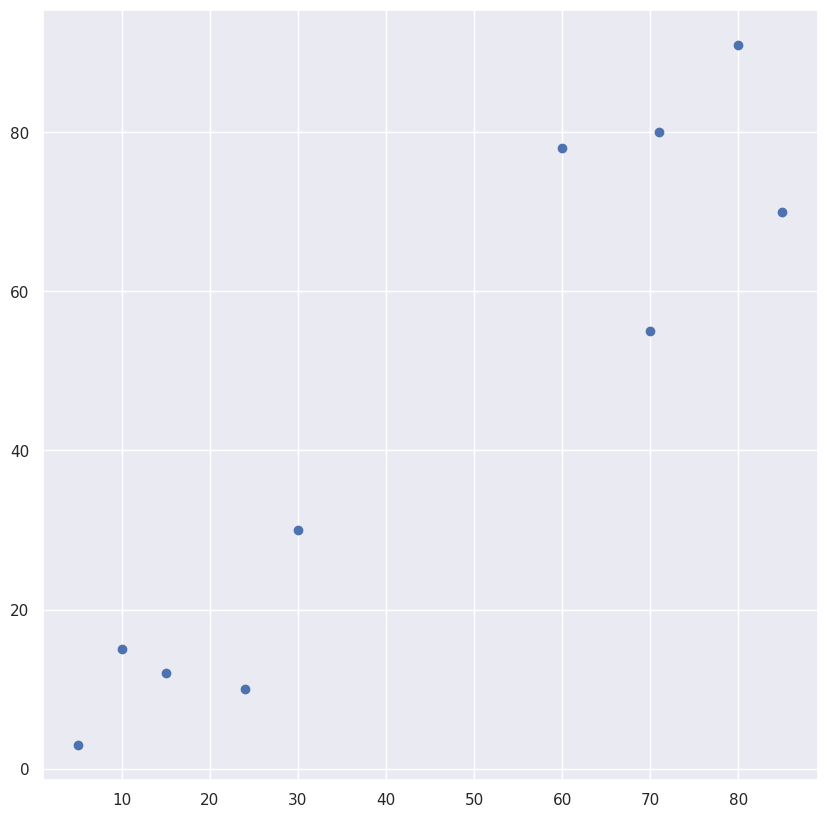

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

plt.scatter(X[:,0],X[:,1])

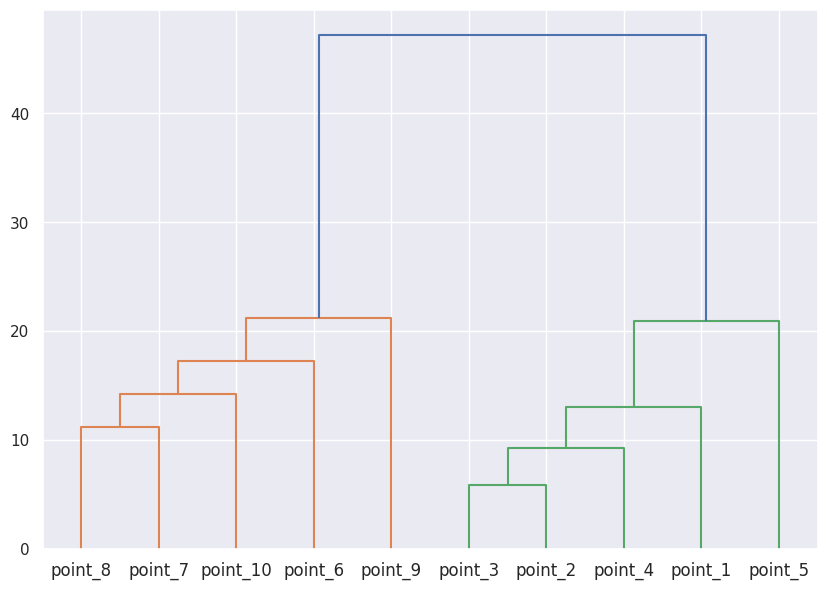

In [ ]:
linked = linkage(X, 'single')
labelList = [f'point_{i}' for i in range(1, len(X)+1)]

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Результат возвращается в следующем формате:

Каждая строка матрицы содержит 4 числа:
Первые два числа - индексы двух кластеров, которые объединяются на данном этапе
Третье число - расстояние между объединяемыми кластерами
Четвертое число - количество исходных наблюдений в новом кластере

In [ ]:
linked

array([[ 1.        ,  2.        ,  5.83095189,  2.        ],
       [ 3.        , 10.        ,  9.21954446,  3.        ],
       [ 6.        ,  7.        , 11.18033989,  2.        ],
       [ 0.        , 11.        , 13.        ,  4.        ],
       [ 9.        , 12.        , 14.2126704 ,  3.        ],
       [ 5.        , 14.        , 17.20465053,  4.        ],
       [ 4.        , 13.        , 20.88061302,  5.        ],
       [ 8.        , 15.        , 21.21320344,  5.        ],
       [16.        , 17.        , 47.16990566, 10.        ]])

# DBSCAN

Алгоритм `DBSCAN` - еще один популярный метод кластеризации. Его преимущество состоит в том, что он, в отличие от `KMeans`, способен теоретически выделять кластерные структуры, обладающие практически произвольной геометрией. Например, `KMeans` не способен выделять ленточные кластеры и радиальные кластеры, а `DBSCAN` отлично справляется с этой задачей при условии правильного выбора гиперпараметров. `DBSCAN` также способен самостоятельно обнаруживать выбросы в данных и исключать их из найденных кластерных структур.

### Алгоритм DBSCAN
________________________________

Все объекты в датасете по итогу кластеризации будут поделены на **внутренние**, **граничные** и **выбросы**. **Внутренние** - это объекты, в малой окрестности с некоторым радиусом $ϵ$ которых находится не менее $M$ других объектов. **Граничные** - это объекты, находящиеся в окрестности внутренних. **Выбросы** - это объекты, не попавшие ни в какую окрестность внутренних или граничных объектов.

> 1. Задать гиперпараметры алгоритма: целочисленное значение $M$ и малое $ϵ$
> 2. Задать выборку $U = \{x_i| i = 0...N\}$ неотмеченных объектов
> 3. Пока остаются неотмеченные объекты в выборке:
>> 4. Выбрать случайный неотмеченный объект $x$
>> 5. **Если** в окрестности $x$ больше $M$ объектов, сформировать новый кластер $K$ и отметить все объекты в окрестности $x$, включая сам $x$, как объекты кластера $K$
>> 6. Провести ту же операцию для всех объектов из окрестности $x$
>> 7. **Иначе:** оотметить $x$ как потенциальный выброс  
________________________________

Алгоритм DBSCAN можно найти в том же модуле `sklearn.cluster`. Проверим, как он работает, на известном наборе данных `moons`.

In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
sns.set_theme()
x, y = make_moons(n_samples=200, shuffle=True, noise=5e-2)

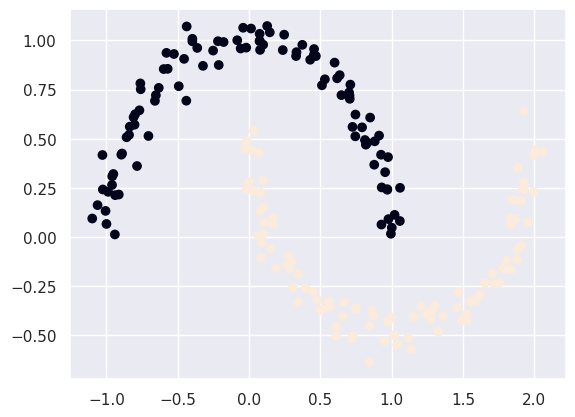

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y)

Алгоритм "видит" этот датасет иначе: для него нет исходного разделения на черный и белый кластеры. Применим DBSCAN, чтобы получить актуальные метки кластеров.



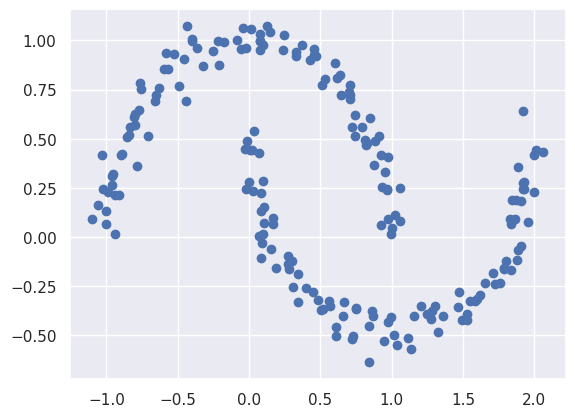

In [ ]:
plt.scatter(x[:, 0], x[:, 1])

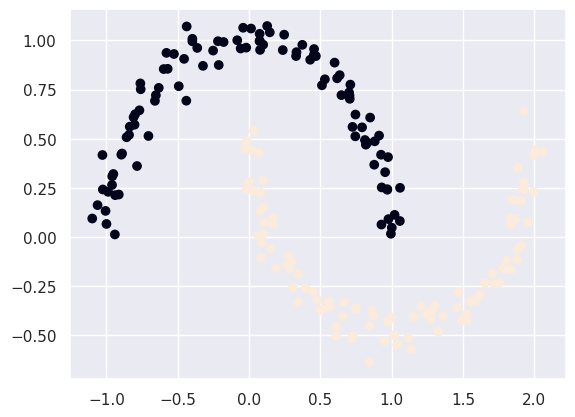

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.25, min_samples=2).fit(x)

# для обращения к результатам кластеризации нужно обратиться к полю clustering.labels_
clust = clustering.labels_
plt.scatter(x[:, 0], x[:, 1], c=clust)

Кластеризация получилась идеальная. Но нужно отметить, что она очень сильно зависит от правильного выбора параметра eps. Например, если мы немного уменьшим eps, получим намного больше кластеров, чем ожидаем:

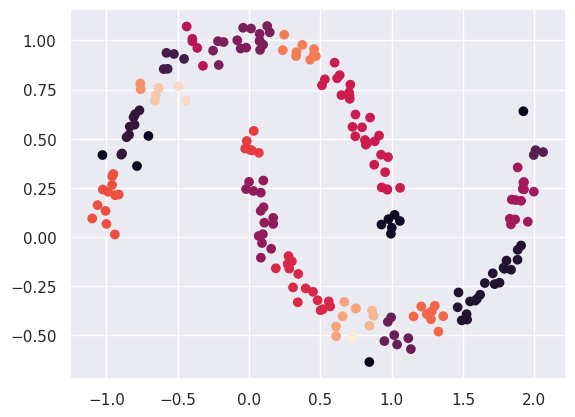

In [ ]:
clustering = DBSCAN(eps=0.1, min_samples=2).fit(x)
clust = clustering.labels_
plt.scatter(x[:, 0], x[:, 1], c=clust)

А если немного увеличим, то все точки будут отнесены к единому кластеру.

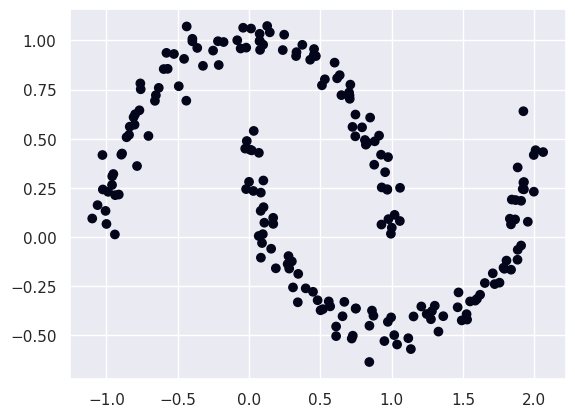

In [ ]:
clustering = DBSCAN(eps=0.5, min_samples=2).fit(x)
clust = clustering.labels_
plt.scatter(x[:, 0], x[:, 1], c=clust)

Это важное ограничение `DBSCAN`. Нужно помнить о том, что изменение набора гиперпараметров по сравнению с `KMeans` не снимает с нас работы, связанной с их подбором. Несмотря на эту сложность, `DBSCAN` - очень полезный алгоритм кластеризации, который позволяет выделять кластеры, обладающие сложной регулярностью.